<a href="https://colab.research.google.com/github/yogasgm/data-science-machine-learning-BI/blob/main/Introduction_to_EDA_Data_Preprocessing_n_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Data Preprocessing**

## **1. Importing Required Libraries**

In [1]:
# Libraries for Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array computations
import warnings  # For handling warnings

# Statistical Analysis
from scipy.stats import skew, kurtosis  # To calculate skewness and kurtosis

# Data Visualization
import matplotlib.pyplot as plt  # For plotting and visualizations
import seaborn as sns  # For interactive data visualizations

# Time Handling
from datetime import datetime  # For handling date and time formats

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder  # To convert categorical data to numerical
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For normalization and standardization

# Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA

# Disable FutureWarning from Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

## **2. Loading Dataset**

In [2]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/yogasgm/data-science-machine-learning-BI/refs/heads/main/dataset/synthetic_bank_data.csv')

In [3]:
# Display first few rows
data.head()

,Customer_ID,Age,Annual_Income,Credit_Score,Account_Type,Account_Balance,Bank_Branch,Signup_Date,Is_Active
0,1,58,76081.60,724.0,Savings,48837.88,Jakarta,2016-08-09,Yes
1,2,48,65607.99,695.0,Business,30331.27,Surabaya,2016-09-23,Yes
2,3,34,69637.48,706.0,Savings,31056.12,Medan,2017-08-31,Yes
3,4,62,67298.56,700.0,Business,29292.34,Surabaya,2016-03-12,Yes
4,5,27,55509.10,666.0,Savings,17912.88,Jakarta,2017-04-20,No


In [4]:
# Display last few rows
data.tail()

,Customer_ID,Age,Annual_Income,Credit_Score,Account_Type,Account_Balance,Bank_Branch,Signup_Date,Is_Active
997,998,64,78415.39,731.0,Savings,45248.41,Jakarta,2020-03-22,Yes
998,999,25,45393.71,638.0,Checking,13356.58,Medan,2015-03-28,No
999,1000,56,73421.71,717.0,Checking,41051.28,Medan,2019-02-19,Yes
1000,1,58,76081.60,724.0,Savings,48837.88,Jakarta,2016-08-09,Yes
1001,2,48,65607.99,695.0,Business,30331.27,Surabaya,2016-09-23,Yes


## **3. Initial Exploratory Data Analysis (EDA)**

In [5]:
# Display basic dataset information
print("\n📌 Columns in dataset:")
print(data.columns)
print("\n📌 Shape of dataset:", data.shape)


📌 Columns in dataset:
Index(['Customer_ID', 'Age', 'Annual_Income', 'Credit_Score', 'Account_Type',
       'Account_Balance', 'Bank_Branch', 'Signup_Date', 'Is_Active'],
      dtype='object')

📌 Shape of dataset: (1002, 9)


In [6]:
# Summary statistics
display(data.describe())

,Customer_ID,Age,Annual_Income,Credit_Score,Account_Balance
count,1002.000000,1002.000000,952.000000,952.000000,1002.000000
mean,499.503992,44.846307,64187.121061,690.829832,25104.453113
std,289.389896,14.338854,13520.423874,37.987496,12864.180793
min,1.000000,20.000000,31676.070000,600.000000,3964.330000
25%,249.250000,33.000000,54078.552500,662.000000,14753.332500
50%,499.500000,45.000000,62907.465000,687.000000,23320.400000
75%,749.750000,56.000000,73365.152500,717.000000,33229.910000
max,1000.000000,69.000000,102859.260000,800.000000,87004.796285


In [7]:
# Dataset info
print("\n📌 Dataset Information:")
data.info()


📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      1002 non-null   int64  
 1   Age              1002 non-null   int64  
 2   Annual_Income    952 non-null    float64
 3   Credit_Score     952 non-null    float64
 4   Account_Type     1000 non-null   object 
 5   Account_Balance  1002 non-null   float64
 6   Bank_Branch      1002 non-null   object 
 7   Signup_Date      1002 non-null   object 
 8   Is_Active        1002 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 70.6+ KB


## **4. Handling Data Formats**

In [8]:
# Check data types
print("\n📌 Data Types Before Conversion:")
print(data.dtypes)


📌 Data Types Before Conversion:
Customer_ID          int64
Age                  int64
Annual_Income      float64
Credit_Score       float64
Account_Type        object
Account_Balance    float64
Bank_Branch         object
Signup_Date         object
Is_Active           object
dtype: object


In [9]:
# Convert 'Signup_Date' to datetime format
data['Signup_Date'] = pd.to_datetime(data['Signup_Date'], errors='coerce')
print("\n✅ 'Signup_Date' converted to datetime format.")


✅ 'Signup_Date' converted to datetime format.


In [10]:
# Standardize text in categorical columns
for col in ['Account_Type', 'Bank_Branch']:
    if col in data.columns:
        data[col] = data[col].str.lower().str.strip()
        print(f"\n✅ Column '{col}' standardized.")


✅ Column 'Account_Type' standardized.

✅ Column 'Bank_Branch' standardized.


In [11]:
# Check data types after conversion
print("\n📌 Data Types After Conversion:")
print(data.dtypes)


📌 Data Types After Conversion:
Customer_ID                 int64
Age                         int64
Annual_Income             float64
Credit_Score              float64
Account_Type               object
Account_Balance           float64
Bank_Branch                object
Signup_Date        datetime64[ns]
Is_Active                  object
dtype: object


## **5. Handling Duplicate Data**

In [12]:
# Count duplicates
duplicates = data.duplicated().sum()
print(f"\n📌 Number of duplicates: {duplicates}")


📌 Number of duplicates: 2


In [13]:
# Drop duplicates if any
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print("\n✅ Duplicates removed.")


✅ Duplicates removed.


## **6. Handling Missing Values**

In [14]:
# Check for missing values
missing_values = data.isna().sum()
print("\n📌 Missing Values per Column:")
print(missing_values[missing_values > 0])


📌 Missing Values per Column:
Annual_Income    50
Credit_Score     50
Account_Type      2
dtype: int64


In [15]:
# Identification Imputation Method
for col in data.columns:
    if data[col].isna().sum() > 0:
        if data[col].dtype == 'float64' or data[col].dtype == 'int64':
            print(f"\n🔍 Kolom numerik '{col}' memiliki missing values. Disarankan imputasi dengan median atau mean.")
        elif data[col].dtype == 'object':
            print(f"\n🔍 Kolom kategorikal '{col}' memiliki missing values. Disarankan imputasi dengan mode atau kategori 'Unknown'.")


🔍 Kolom numerik 'Annual_Income' memiliki missing values. Disarankan imputasi dengan median atau mean.

🔍 Kolom numerik 'Credit_Score' memiliki missing values. Disarankan imputasi dengan median atau mean.

🔍 Kolom kategorikal 'Account_Type' memiliki missing values. Disarankan imputasi dengan mode atau kategori 'Unknown'.


In [16]:
# Calculate skewness and kurtosis
skewness = data['Annual_Income'].skew()
kurt = data['Annual_Income'].kurtosis()

print("\n📌 Skewness Annual_Income:", skewness)
print("📌 Kurtosis Annual_Income:", kurt)


📌 Skewness Annual_Income: 0.2985301368399454
📌 Kurtosis Annual_Income: -0.4261214197637848


In [17]:
# Using Mean for Annual_Income because the distribution is close to normal
mean_income = data['Annual_Income'].mean()
data['Annual_Income'].fillna(mean_income, inplace=True)

print("\n✅ Missing values in 'Annual_Income' have been filled with Mean:", mean_income)


✅ Missing values in 'Annual_Income' have been filled with Mean: 64173.10490526316


In [18]:
# Calculating skewness and kurtosis
skewness = data['Credit_Score'].skew()
kurt = data['Credit_Score'].kurtosis()

print("\n📌 Skewness Credit_Score:", skewness)
print("📌 Kurtosis Credit_Score:", kurt)


📌 Skewness Credit_Score: 0.2992944118923113
📌 Kurtosis Credit_Score: -0.42486672539602033


In [19]:
# Using Mean for Credit_Score because the distribution is close to normal
mean_credit_score = data['Credit_Score'].mean()
data['Credit_Score'].fillna(mean_credit_score, inplace=True)

print("\n✅ Missing values in 'Credit_Score' have been filled with Mean:", mean_credit_score)


✅ Missing values in 'Credit_Score' have been filled with Mean: 690.7905263157895


In [20]:
# Imputation for 'Account_Type'
if 'Account_Type' in data.columns and data['Account_Type'].isna().sum() > 0:
    mode_account = data['Account_Type'].mode()[0]
    data['Account_Type'].fillna(mode_account, inplace=True)
    print(f"\n✅ Missing value in 'Account_Type' have been filled with Mode: {mode_account}")


✅ Missing value in 'Account_Type' have been filled with Mode: business


## **7. Detecting & Handling Outliers**

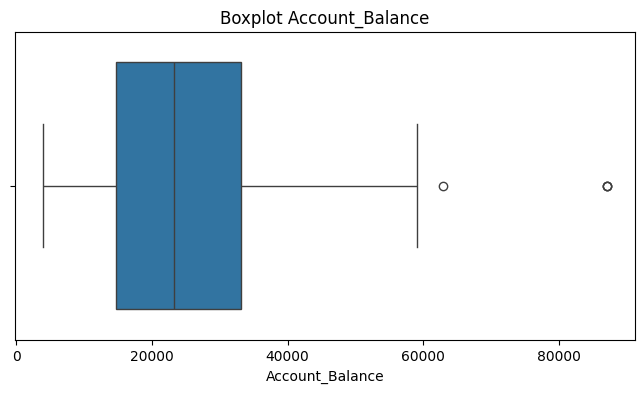

In [21]:
# Boxplot for outlier detection in Account_Balance
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Account_Balance'])
plt.title("Boxplot Account_Balance")
plt.show()

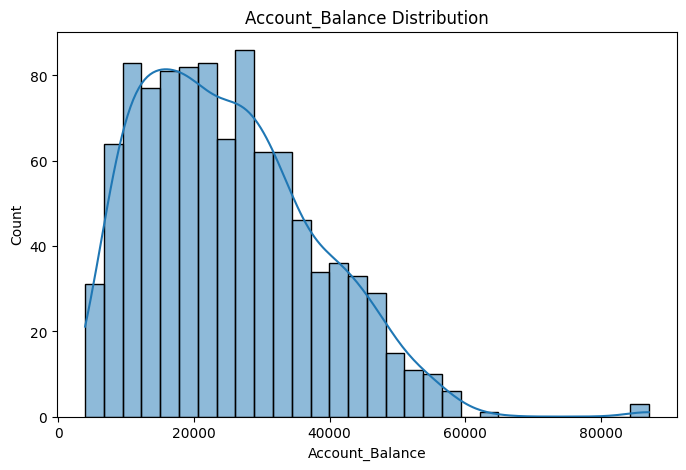

In [22]:
# Account_Balance Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Account_Balance'], bins=30, kde=True)
plt.title("Account_Balance Distribution")
plt.show()

In [23]:
# Calculate Q1 (25%) and Q3 (75%)
Q1 = data['Account_Balance'].quantile(0.25)
Q3 = data['Account_Balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundariesKik untuk menerapkan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the number of outliers
outliers = data[(data['Account_Balance'] < lower_bound) | (data['Account_Balance'] > upper_bound)]
print(f"\n📌 Number of outliers in 'Account_Balance': {outliers.shape[0]}")


📌 Number of outliers in 'Account_Balance': 4


In [24]:
# Using Winsorizing to reduce outliers
data['Account_Balance'] = np.where(data['Account_Balance'] > upper_bound, upper_bound,
                                   np.where(data['Account_Balance'] < lower_bound, lower_bound, data['Account_Balance']))

print("\n✅ Outliers on 'Account_Balance' have been handled by Winsorizing.")


✅ Outliers on 'Account_Balance' have been handled by Winsorizing.


## **8. Feature Correlation & Visualization**

In [25]:
# Display the correlation between age, annual_income, credit_score, and account_balance
display(data[['Age', 'Annual_Income', 'Credit_Score', 'Account_Balance']].corr())

,Age,Annual_Income,Credit_Score,Account_Balance
Age,1.000000,0.752638,0.752585,0.318238
Annual_Income,0.752638,1.000000,0.999972,0.366770
Credit_Score,0.752585,0.999972,1.000000,0.366517
Account_Balance,0.318238,0.366770,0.366517,1.000000


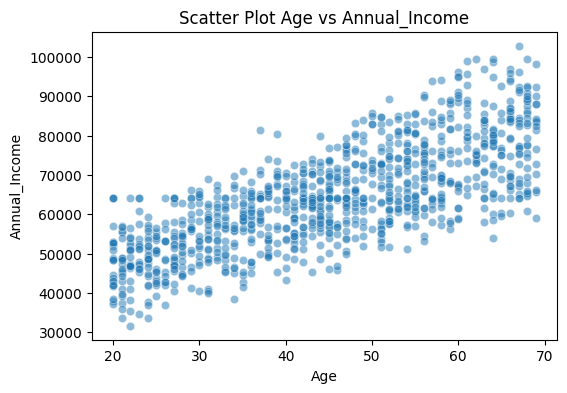

In [26]:
# Scatter Plot Age vs Annual_Income
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Age'], y=data['Annual_Income'], alpha=0.5)
plt.title("Scatter Plot Age vs Annual_Income")
plt.show()

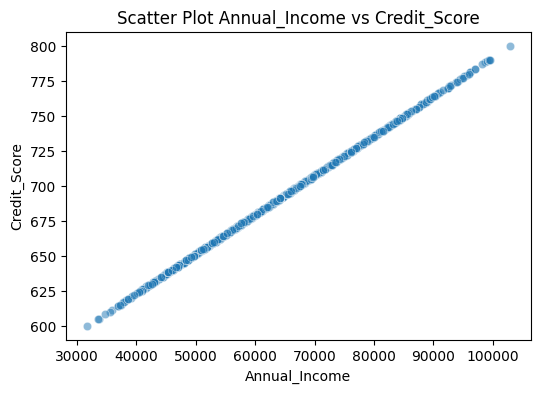

In [27]:
# Scatter Plot Annual_Income vs Credit_Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Annual_Income'], y=data['Credit_Score'], alpha=0.5)
plt.title("Scatter Plot Annual_Income vs Credit_Score")
plt.show()

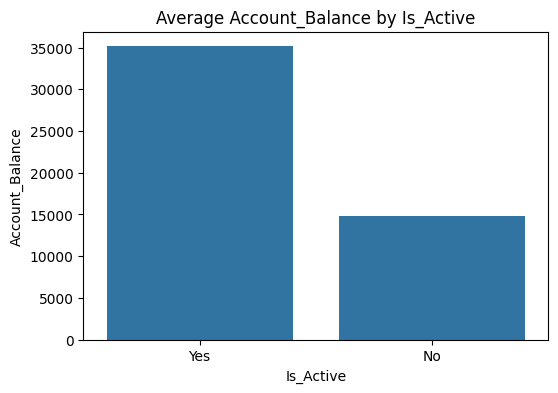

In [28]:
# Bar Plot of average Account_Balance by Is_Active
plt.figure(figsize=(6, 4))
sns.barplot(x='Is_Active', y='Account_Balance', data=data, ci=None)
plt.title("Average Account_Balance by Is_Active")
plt.show()

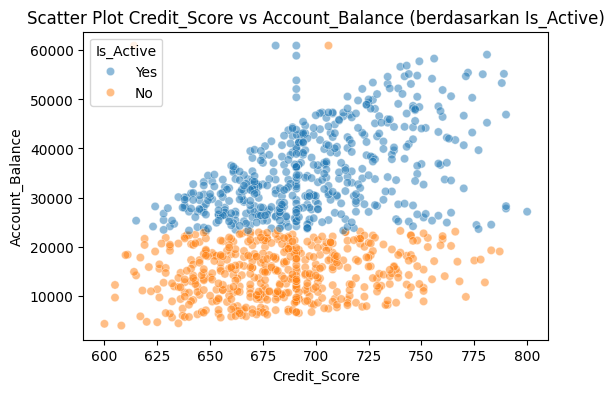

In [29]:
# Scatter Plot Credit_Score vs Account_Balance with color based on Is_Active
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Credit_Score'], y=data['Account_Balance'], hue=data['Is_Active'], alpha=0.5)
plt.title("Scatter Plot Credit_Score vs Account_Balance (berdasarkan Is_Active)")
plt.show()

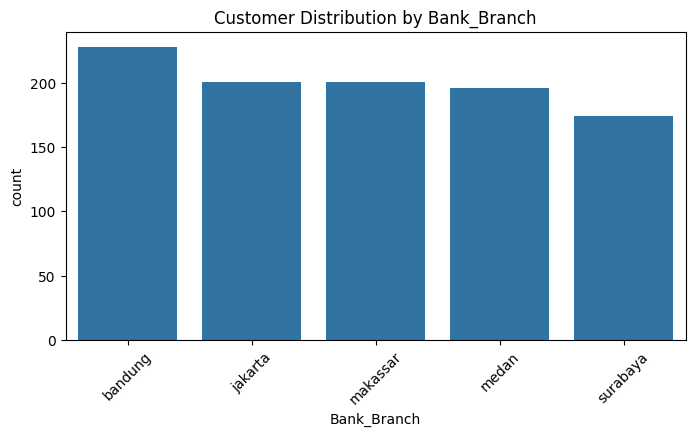

In [30]:
# Bar Plot of customer distribution by Bank_Branch
plt.figure(figsize=(8, 4))
sns.countplot(x='Bank_Branch', data=data, order=data['Bank_Branch'].value_counts().index)
plt.title("Customer Distribution by Bank_Branch")
plt.xticks(rotation=45)
plt.show()

## **9. Feature Engineering**

In [31]:
# Calculate customer tenure
data['Customer_Tenure'] = (datetime.today() - data['Signup_Date']).dt.days

print("\n✅ 'Customer_Tenure' feature added.")


✅ 'Customer_Tenure' feature added.


In [32]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['Account_Type', 'Bank_Branch'], drop_first=True)

print("\n✅ One-Hot Encoding applied for 'Account_Type' dan 'Bank_Branch'.")


✅ One-Hot Encoding applied for 'Account_Type' dan 'Bank_Branch'.


In [33]:
# Scaler initialization
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Choose numerical features to scale
num_cols = ['Annual_Income', 'Credit_Score', 'Account_Balance']

# Apply Min-Max Scaling
data[num_cols] = minmax_scaler.fit_transform(data[num_cols])

print("\n✅ Min-Max Scaling has been applied to numerical features.")


✅ Min-Max Scaling has been applied to numerical features.


In [34]:
# Show Feature Engineering results
data.head()

,Customer_ID,Age,Annual_Income,Credit_Score,Account_Balance,Signup_Date,Is_Active,Customer_Tenure,Account_Type_checking,Account_Type_savings,Bank_Branch_jakarta,Bank_Branch_makassar,Bank_Branch_medan,Bank_Branch_surabaya
0,1,58,0.623820,0.620,0.787784,2016-08-09,Yes,3120,False,True,True,False,False,False
1,2,48,0.476684,0.475,0.462888,2016-09-23,Yes,3075,False,False,False,False,False,True
2,3,34,0.533292,0.530,0.475614,2017-08-31,Yes,2733,False,True,False,False,True,False
3,4,62,0.500434,0.500,0.444649,2016-03-12,Yes,3270,False,False,False,False,False,True
4,5,27,0.334813,0.330,0.244876,2017-04-20,No,2866,False,True,True,False,False,False


## **10. Principal Component Analysis (PCA)**

In [35]:
# Select numerical columns for PCA
num_cols_pca = ['Annual_Income', 'Credit_Score', 'Account_Balance']
data_pca = zscore_scaler.fit_transform(data[num_cols_pca])

# Determine optimal number of components
pca = PCA()
pca.fit(data_pca)

PCA()

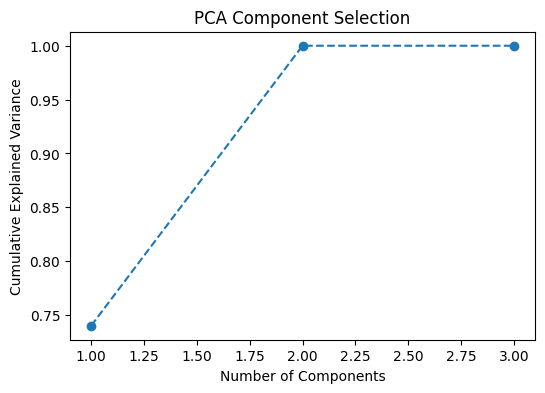

In [36]:
# Visualize variance explained
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(num_cols_pca) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Component Selection')
plt.show()

In [37]:
# Select the number of components based on the elbow point (misalnya, 2 komponen utama)
pca = PCA(n_components=2)
data_pca_transformed = pca.fit_transform(data_pca)

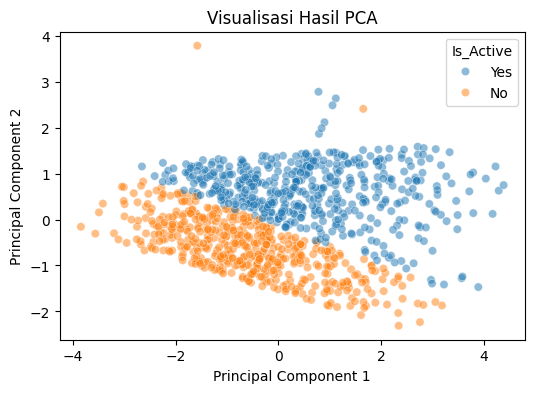


✅ PCA telah diterapkan, dan data telah direduksi menjadi 2 dimensi utama.


In [38]:
# Visualize PCA result
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_pca_transformed[:, 0], y=data_pca_transformed[:, 1], alpha=0.5, hue=data.get('Is_Active', None))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Hasil PCA')
plt.show()

print("\n✅ PCA telah diterapkan, dan data telah direduksi menjadi 2 dimensi utama.")